# Demo - Bayesian Neural Network with Iris Data

In [1]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Iris Data

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
Y = iris.target 

In [5]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

## 2. Define Model

In [6]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.05, in_features=4, out_features=10),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.05, in_features=10, out_features=3),
)

In [7]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 3. Train Model

In [8]:
for step in range(2000):
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 500 == 0 :
        _, predicted = torch.max(pre.data, 1)
        total = y.size(0)
        correct = (predicted == y).sum()
        print('Step: %d, Accuracy: %f %%' % (step, 100 * float(correct) / total))

Step: 0, Accuracy: 33.333333 %
Step: 500, Accuracy: 68.000000 %
Step: 1000, Accuracy: 90.000000 %
Step: 1500, Accuracy: 96.000000 %


## 4. Test Model

In [9]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

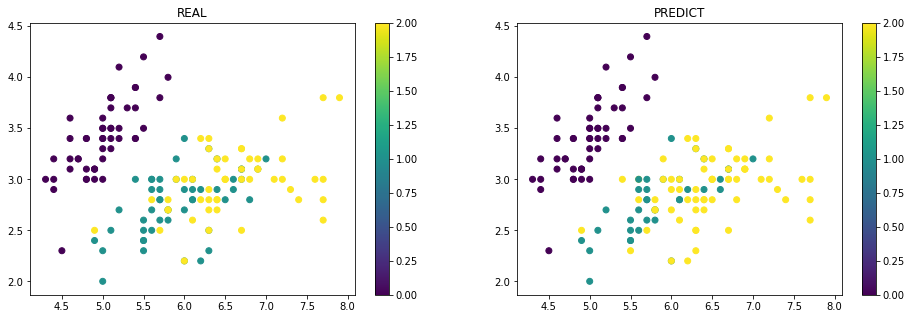

In [10]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

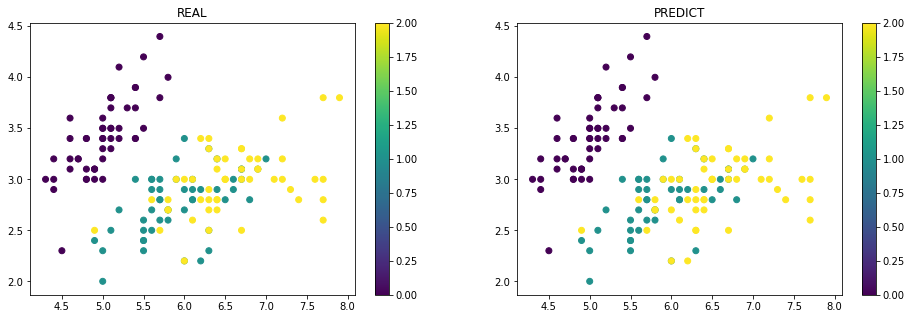

In [11]:
# Bayesian Neural Network will return different outputs even if inputs are same.
# In other words, different plots will be shown every time forward method is called.
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)